### Дерунец Роман 20930, вариант 2

3.1. Проверить гипотезу о независимости переменных по критерию Хи-
квадрат (2 балла)  


3.2. Вычислить оценку ковариации, коэффициента корреляции (2 балла).  
Проверить гипотезу о незначимости коэффициента корреляции (2 балла).


3.3. Оценить параметры линейной регрессии (1 балл), вычислить  
коэффициент детерминации (1 балл), проверить значимость модели по
критерию Фишера (2 балла).


Iris Setosa, Длина
чашелистика, Длина
лепестка

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression

df = pd.read_csv('Dataframe.csv', sep=' ')
df = df.drop(df[df.iris_species != 'setosa'].index)
mini1 = min(df['sepal_length'])  # Нашли минимальные и максимальные значения каждого столбца, чтобы правильно определить
maxi1 = max(df['sepal_length'])  # периоды
mini2 = min(df['petal_length'])
maxi2 = max(df['petal_length'])
print(maxi1)

# 3.1
print('Пункт 3.1')
leni = 6  # Из формулы 1 + 3,32 * lg(50)

# Заранее составим подходящие нам интервалы Y - (4.1;4.4] u (4.4;4.7] u (4.7;5] u (5;5.3] u (5.3;5.6] u (5.6;5.9)
# X - [0.85;1.05] u (1.05;1.25] u (1.25;1.45] u (1.45;1.65] u (1.65;1.85] u (1.85;2.05]. А теперь составим таблицу

x = pd.Series(df['sepal_length'])
y = pd.Series(df['petal_length'])

l = []
for i in range(6):
    l.append([0, 0, 0, 0, 0, 0])

for n1, n2 in zip([4.1, 4.41, 4.71, 5.01, 5.31, 5.61], [4.4, 4.7, 5, 5.3, 5.6, 5.9]):
    s = x.between(n1, n2)
    for m1, m2 in zip([0.85, 1.051, 1.251, 1.451, 1.651, 1.851], [1.05, 1.25, 1.45, 1.65, 1.85, 2.05]):
        k = y.between(m1, m2)
        df2 = pd.concat([s, k], axis=1)
        for i in range(0, 50):
            if df2['sepal_length'][i] == True and df2['petal_length'][i] == True:
                ind1 = int((n1 - 4.31) // 0.3)
                ind2 = int((m1 - 1.01) // 0.2)
                l[ind1][ind2] += 1
df4 = pd.DataFrame(l, index=["(4.1;4.4]", "(4.4;4.7]", "(4.7;5]", "(5;5.3]", "(5.3;5.6]", "(5.6;5.9)"],
                   columns=['[0.85;1.05]', '(1.05;1.25]', '(1.25;1.45]', '(1.45;1.65]', '(1.65;1.85]', '(1.85;2.05]']).T
df4['i'] = df4.sum(axis=1)
df4.loc['j'] = df4.sum()
print(df4)
# Теперь приступим к вычислениям
n = 0
for i, j in zip(["(4.1;4.4]", "(4.4;4.7]", "(4.7;5]", "(5;5.3]", "(5.3;5.6]", "(5.6;5.9)"], range(6)):
    n += df4[i][j]**2 / (df4[i][6] * df4["i"][j])
n -= 1
n *= len(df['sepal_length'])
xi = 37.6   # Из таблицы распределения хи квадрата

if n > xi:
    print('Гипотеза о независимости длины чашелистника и длины лепестка отвергается тк', n, '>', xi)
else:
    print('Гипотеза о независимости длины чашелистника и длины лепестка подверждается тк', n, '<', xi)

5.8
Пункт 3.1
             (4.1;4.4]  (4.4;4.7]  (4.7;5]  (5;5.3]  (5.3;5.6]  (5.6;5.9)   i
[0.85;1.05]          0          1        0        0          1          1   3
(1.05;1.25]          4          7        3        3          0          3  20
(1.25;1.45]          2          8        7        2          1          0  20
(1.45;1.65]          0          0        1        2          1          0   4
(1.65;1.85]          0          1        1        0          0          0   2
(1.85;2.05]          1          0        0        0          0          0   1
j                    7         17       12        7          3          4  50
Гипотеза о независимости длины чашелистника и длины лепестка подверждается тк -25.442927170868344 < 37.6


In [28]:
print('Пункт 3.2')

mean_x = sum(df['sepal_length'])/len(df['sepal_length'])  # Находим выборочные среднее выборок X и Y
mean_y = sum(df['petal_length'])/len(df['petal_length'])

sub_x = [i - mean_x for i in df['sepal_length']]     # По формуле отнимаем от элементов выборок Х и У, их среднее и
sub_y = [i - mean_y for i in df['petal_length']]    # складываем в наши списки

cov = (sum([sub_x[i] * sub_y[i] for i in range(len(sub_x))])) / (len(df['petal_length']) - 1)
print("Оценка ковариации коэффициента корелляции равна", cov)

# Для начала найдём выборочный коэффициент корелляции

mean_xy = sum((df['sepal_length'] * df['petal_length'])/len(df['sepal_length']))
s_xy = mean_xy - mean_y*mean_x
mean_x2 = sum(i**2 for i in df['sepal_length'])/len(df['sepal_length'])
mean_y2 = sum(i**2 for i in df['petal_length'])/len(df['petal_length'])
s_x = (mean_x2 - mean_x**2)**0.5
s_y = (mean_y2 - mean_y**2)**0.5
r_xy = s_xy/(s_x*s_y)
t = (r_xy * (len(df['petal_length']) - 2)**0.5) / (1 - r_xy ** 2) ** 0.5
# А теперь сравним наше распределение статистики со значением из таблицы Стьюдента при alpha = 0.01
st = 2.57
print("Сам коэфецент корелляции равен", r_xy)
if st > t:
    print("Значит гипотеза о незначемости коэфецента коркеелляции подтверждается тк", st, ">", t)
else:
    print("Значит гипотеза отвергается на данном уровне значимости 0.99, тк", st, "<", t)

Пункт 3.2
Оценка ковариации коэффициента корелляции равна 0.01635510204081632
Сам коэфецент корелляции равен 0.2671757588687356
Значит гипотеза о незначемости коэфецента коркеелляции подтверждается тк 2.57 > 1.9208759925797505


Пункт 3.3


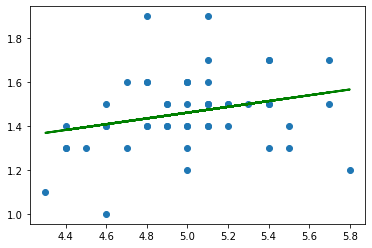

Уравнение линейной регрессии: Y = 0.80305 + 0.13163X 
Все нужные параметры можно легко увидеть
Как нам известно, коэфецент детерминации равен квадрату коэфецента корелляции, а точнее 0.07138288612708477
Гипотза о значимости критерия Фишера будет значимой тк 3.6897645788692426 < 4.08


In [29]:
# 3.3
print("Пункт 3.3")

x = df['sepal_length'].values.reshape(-1, 1)
y = df['petal_length'].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(x, y)
plt.scatter(df['sepal_length'], df['petal_length'])
plt.plot(df['sepal_length'], reg.predict(x), color='green', linewidth=2)
plt.show()
print("Уравнение линейной регрессии: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]),
      "\nВсе нужные параметры можно легко увидеть")

de = r_xy**2
print("Как нам известно, коэфецент детерминации равен квадрату коэфецента корелляции, а точнее", de)

m = 1
f = (de/(1-de)) * (len(df['petal_length']) - m - 1)/m
fi = 4.08   # При уровне значимости 0.05
if f > fi:
    print("Гипотза о значимости критерия Фишера будет отвергнута тк", f, ">", fi)
else:
    print("Гипотза о значимости критерия Фишера будет значимой тк", f, "<", fi)